# Visualization

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\admin\Desktop\project\steam_project\notebooks\steam_final2.csv")
df

,title,price,original_price,discount,release_date,platforms,review_count
0,Counter-Strike 2,0,0,100,2012-08-21,"Windows, Linux",777809730
1,Umamusume: Pretty Derby,0,0,100,2025-06-24,Windows,93899530
2,PUBG: BATTLEGROUNDS,0,0,100,2017-12-21,Windows,691565130
3,Marvel Rivals,0,0,100,2024-12-05,Windows,561121130
4,PEAK,359,359,0,2025-06-16,Windows,934183930
...,...,...,...,...,...,...,...
842,Five Nights at Freddy's: Security Breach,899,899,0,2021-12-16,Windows,8434830
843,Across the Obelisk,999,999,0,2021-04-08,"Windows, Mac, Linux",753730
844,The Sims™ 4 Get To Work,2199,2199,0,2015-03-30,Windows,46260
845,Two Point Museum: Fantasy Finds,665,665,0,2025-07-17,"Windows, Mac, Linux",883630


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           847 non-null    object
 1   price           847 non-null    int64 
 2   original_price  847 non-null    int64 
 3   discount        847 non-null    int64 
 4   release_date    838 non-null    object
 5   platforms       847 non-null    object
 6   review_count    847 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 46.4+ KB


In [14]:
df.to_csv("steam_final.csv", index=False)

In [15]:
df

,title,price,original_price,discount,release_date,platforms,review_count
0,Counter-Strike 2,0,0,100,2012-08-21,"Windows, Linux",777809730
1,Umamusume: Pretty Derby,0,0,100,2025-06-24,Windows,93899530
2,PUBG: BATTLEGROUNDS,0,0,100,2017-12-21,Windows,691565130
3,Marvel Rivals,0,0,100,2024-12-05,Windows,561121130
4,PEAK,359,359,0,2025-06-16,Windows,934183930
...,...,...,...,...,...,...,...
842,Five Nights at Freddy's: Security Breach,899,899,0,2021-12-16,Windows,8434830
843,Across the Obelisk,999,999,0,2021-04-08,"Windows, Mac, Linux",753730
844,The Sims™ 4 Get To Work,2199,2199,0,2015-03-30,Windows,46260
845,Two Point Museum: Fantasy Finds,665,665,0,2025-07-17,"Windows, Mac, Linux",883630


# Set style

In [21]:
sns.set(style="whitegrid")


# =====================================================
# =============== UNIVARIATE VISUALIZATION ============
# =====================================================

- The univarient analysis is mostly used to examine the one variable or one column at a time.
- By this we can understand the distribution or the central tendency and the spread of the data.

# 1. Histogram of Price

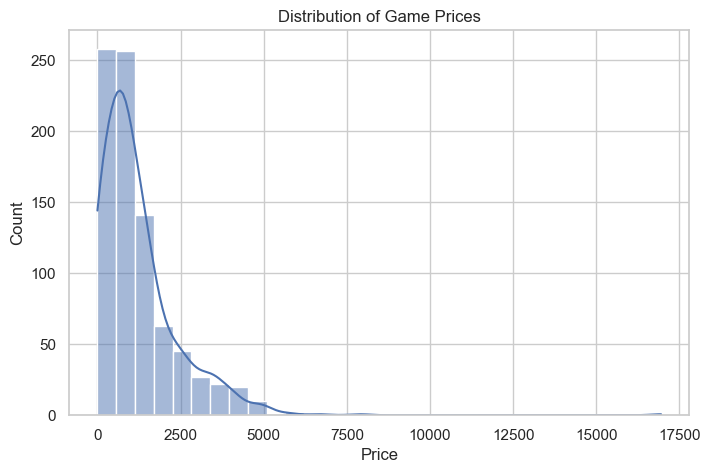

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of Game Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


# Observation: 
- Most games are either free or very low-priced.
- Only a handful of titles are expensive, which creates a right-skewed distribution.

# 2. Boxplot of Review Counts

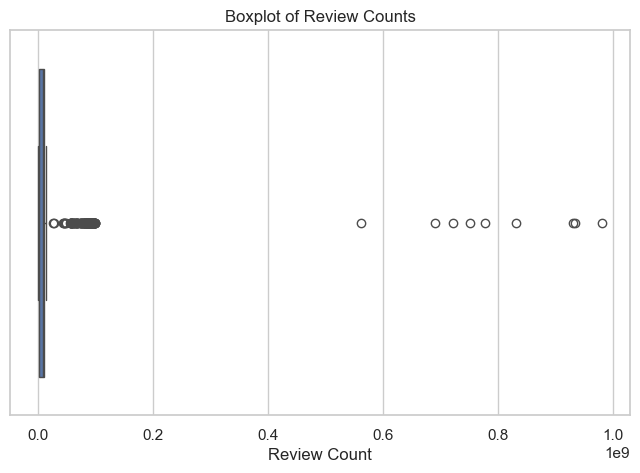

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['review_count'])
plt.title("Boxplot of Review Counts")
plt.xlabel("Review Count")
plt.show()

# Obbservation:
- A few blockbuster games have extremely high review counts.
- The majority of games lie at the lower end, indicating most titles don’t get massive attention.

# 3. Pie Chart of Top 5 Platforms

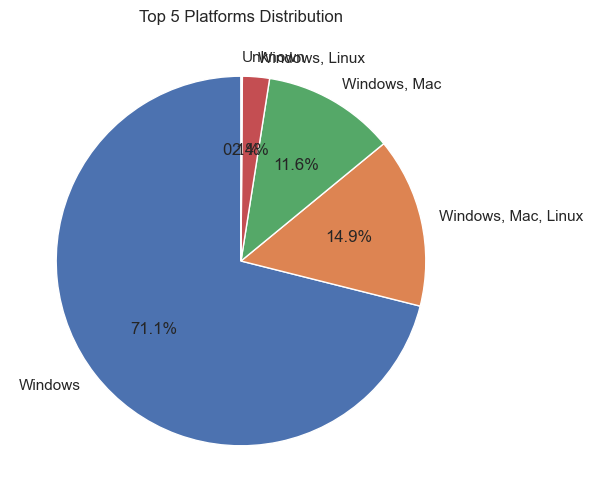

In [24]:
platform_counts = df['platforms'].value_counts().head(5)
plt.figure(figsize=(6,6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Platforms Distribution")
plt.show()

# Observation: 
- The Windows platform dominates game availability.
- Linux and others have a very small share, making Steam heavily PC-focused.

# 4. Bar Chart of Top 10 Discount Levels

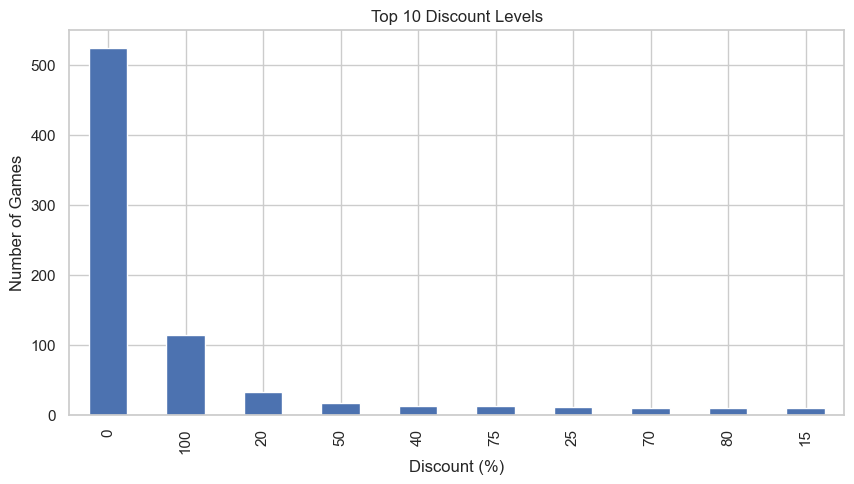

In [26]:
plt.figure(figsize=(10,5))
df['discount'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Discount Levels")
plt.xlabel("Discount (%)")
plt.ylabel("Number of Games")
plt.show()

# Observation: 
- The most frequent discount is 100% (free-to-play).
- Other common discount levels are round figures like 50% and 75%.

# 5. Countplot of Discounts

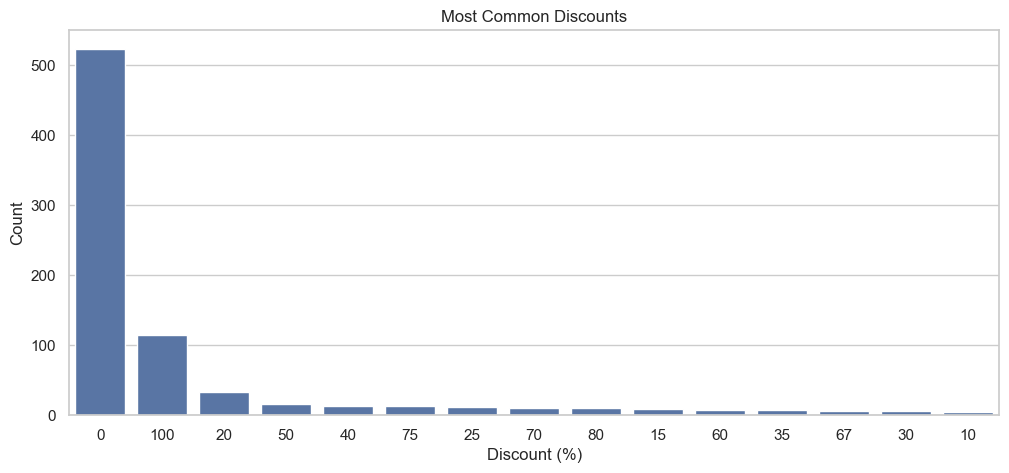

In [36]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="discount", order=df['discount'].value_counts().index[:15])
plt.title("Most Common Discounts")
plt.xlabel("Discount (%)")
plt.ylabel("Count")
plt.show()


# Observation:
- Discounts cluster around round numbers like 0%, 50%, and 100%. Steam clearly uses standardized discount brackets.

# 6. Bar Plot of Release Year

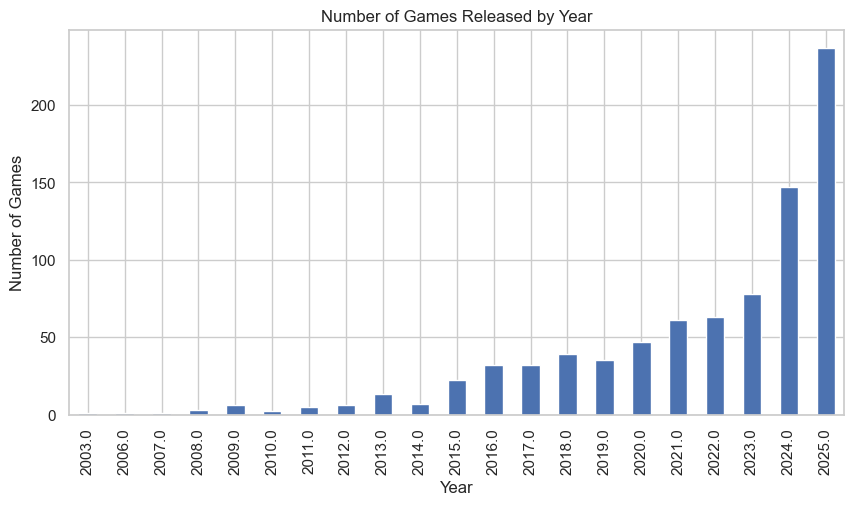

In [38]:
df['release_year'] = pd.to_datetime(df['release_date'], errors="coerce").dt.year
plt.figure(figsize=(10,5))
df['release_year'].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Games Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.show()


# Observation:
- Game releases spike in recent years. Steam’s catalog has grown rapidly in the last decade, showing an expansion in PC gaming.


# =====================================================
# =============== BIVARIATE VISUALIZATION =============
# =====================================================


# 1. Scatter Plot: Price vs Review Count

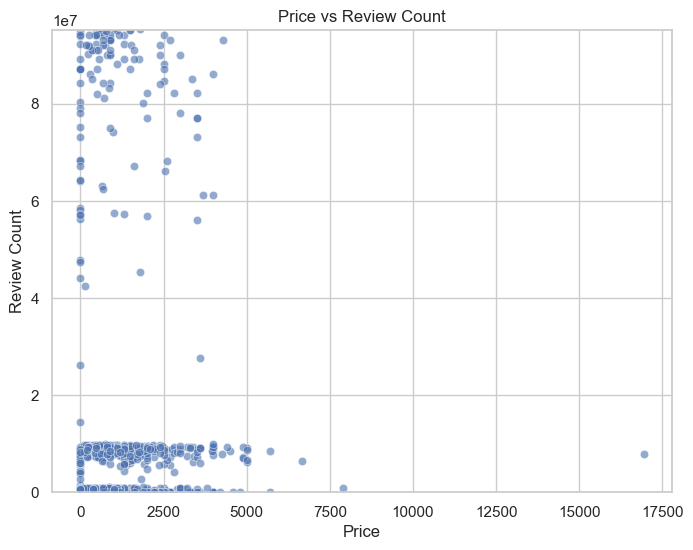

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="price", y="review_count", alpha=0.6)
plt.title("Price vs Review Count")
plt.xlabel("Price")
plt.ylabel("Review Count")
plt.ylim(0, df['review_count'].quantile(0.95)) # trimming extreme outliers
plt.show()

# Observation: 
- Popular games with high review counts are mostly free or low-priced.
- Expensive games generally attract fewer reviews.

# 2. Boxplot: Discount vs Price

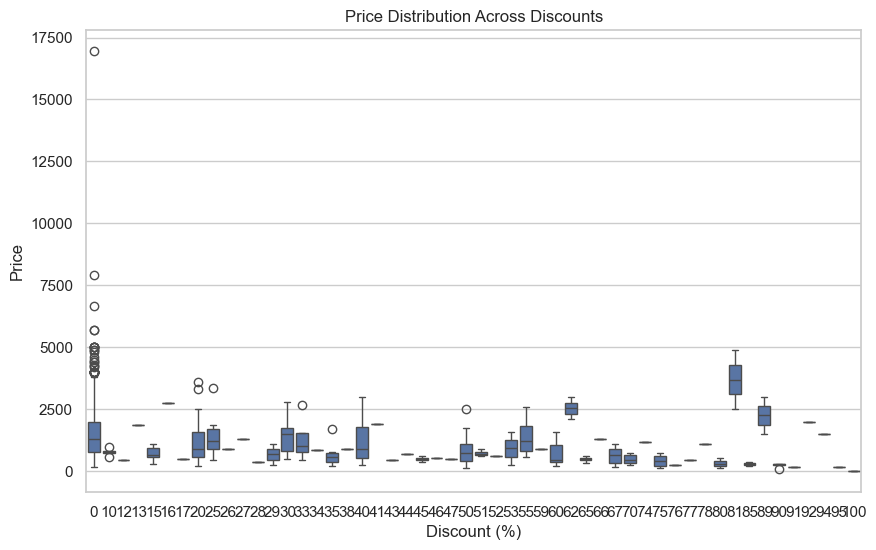

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="discount", y="price")
plt.title("Price Distribution Across Discounts")
plt.xlabel("Discount (%)")
plt.ylabel("Price")
plt.show()

# Observation:
- Higher discounts are usually applied to higher-priced games.
- Games that are free naturally appear at the 100% discount level.

# 3. Bar Chart: Average Review Count by Platform

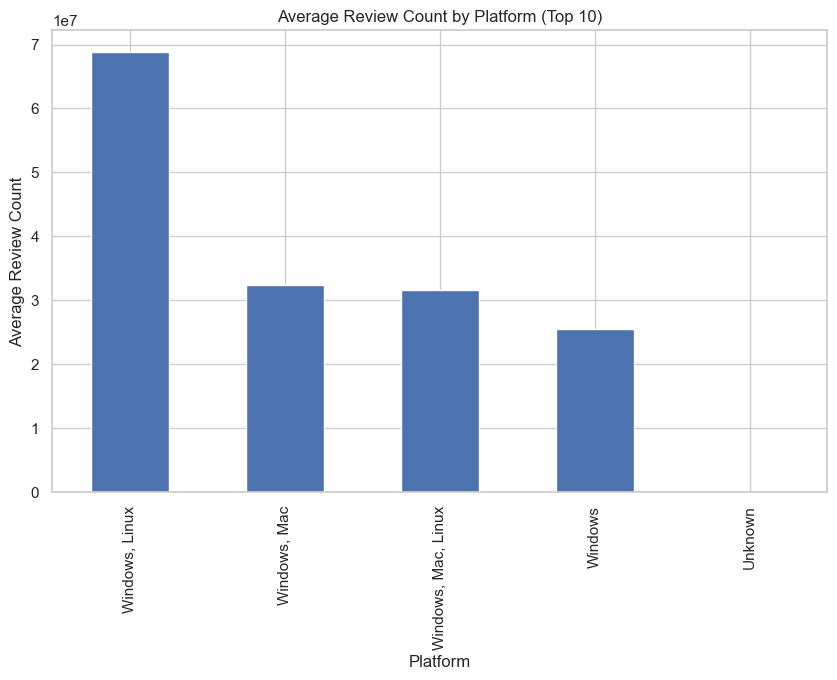

In [31]:
platform_review = df.groupby("platforms")["review_count"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
platform_review.plot(kind="bar")
plt.title("Average Review Count by Platform (Top 10)")
plt.xlabel("Platform")
plt.ylabel("Average Review Count")
plt.show()


# Observation:
- Windows games have the highest average reviews.
- other platforms show much smaller engagement, suggesting players mainly stick to Windows.

# 4. Line Plot of Avg Price by Release Year

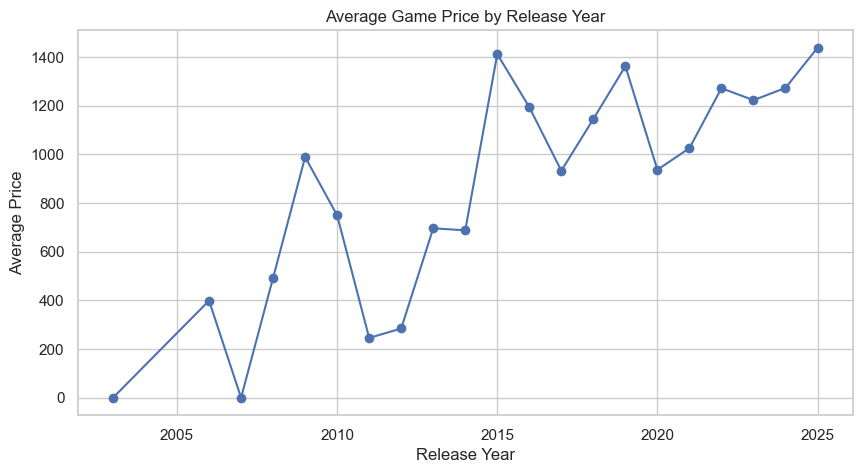

In [39]:
avg_price_by_year = df.groupby("release_year")["price"].mean()
plt.figure(figsize=(10,5))
avg_price_by_year.plot(marker="o")
plt.title("Average Game Price by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Price")
plt.show()


# Observation:
- Prices fluctuate over time. Older releases tend to be cheaper (probably due to discounts), while new releases initially appear at higher prices.

# 5. Scatter Plot: Original Price vs Discount

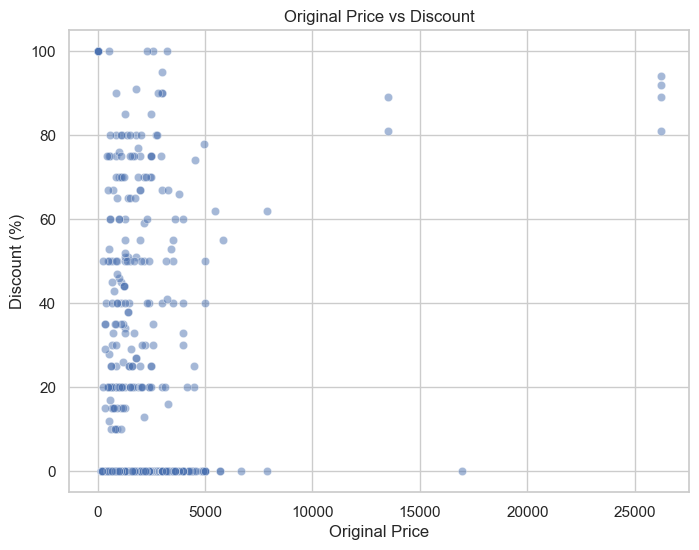

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="original_price", y="discount", alpha=0.5)
plt.title("Original Price vs Discount")
plt.xlabel("Original Price")
plt.ylabel("Discount (%)")
plt.show()


# Observation: 
- Expensive games tend to receive bigger discounts, while cheaper games rarely get massive markdowns.

# 6. Boxplot of Review Count by Platform

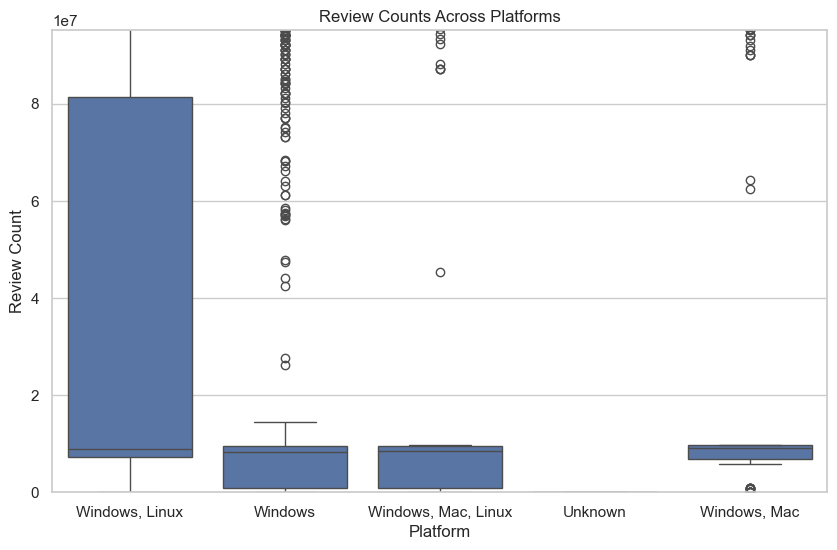

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="platforms", y="review_count")
plt.title("Review Counts Across Platforms")
plt.xlabel("Platform")
plt.ylabel("Review Count")
plt.ylim(0, df['review_count'].quantile(0.95))  # trimming extreme outliers
plt.show()


# Observation:
- Windows games dominate with massive review counts, while Linux and others show very small engagement.

# =====================================================
# =============== MULTIVARIATE VISUALIZATION ==========
# =====================================================

# 1. Heatmap of Correlation

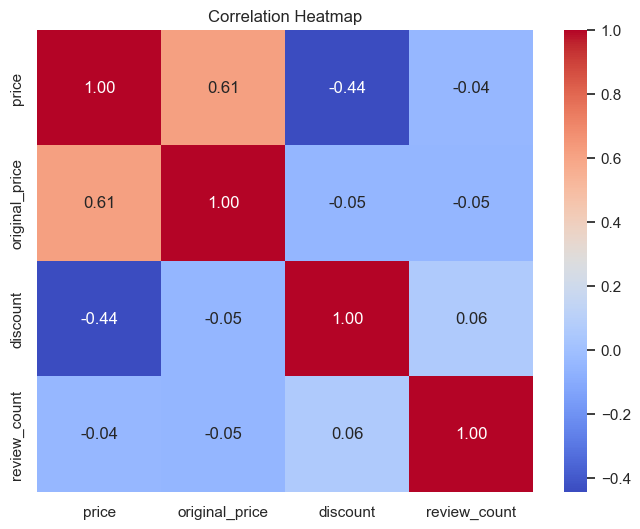

In [32]:
plt.figure(figsize=(8,6))
corr = df[['price','original_price','discount','review_count']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Observation:
- price and original_price are strongly positively correlated (as expected).
- discount is negatively correlated with price, showing higher discounts reduce final price.
- review_count doesn’t correlate strongly with price, meaning popularity isn’t tied to cost.

# 2. Pairplot of Price, Discount, Review Count

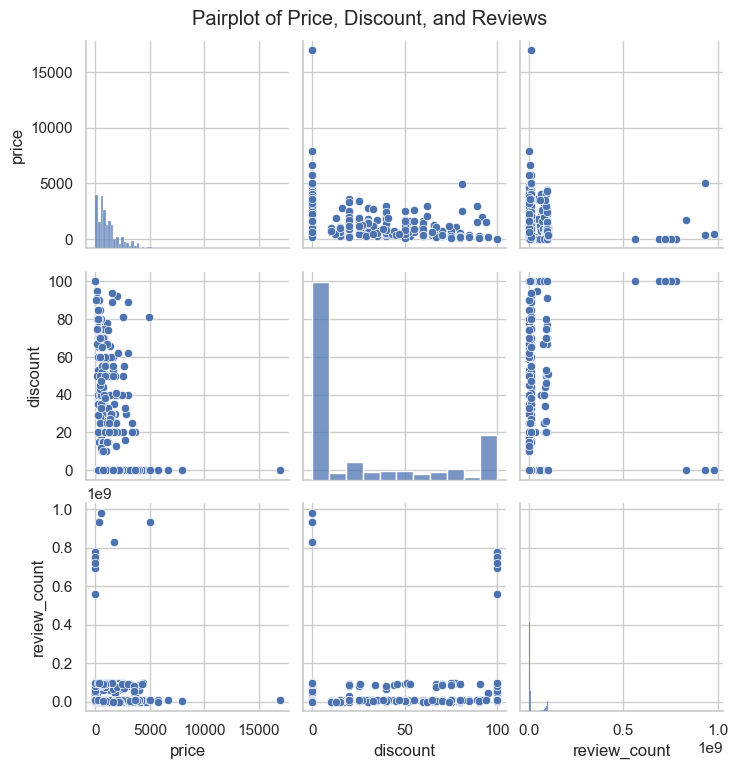

In [34]:
sns.pairplot(df[['price','discount','review_count']])
plt.suptitle("Pairplot of Price, Discount, and Reviews", y=1.02)
plt.show()

# Observation: 
- Confirms the skewed distribution of prices and reviews.
- No clear linear relationship between price and reviews, but discount vs price is obvious.

# 3. Scatter Plot with Hue (Price vs Reviews colored by Discount)

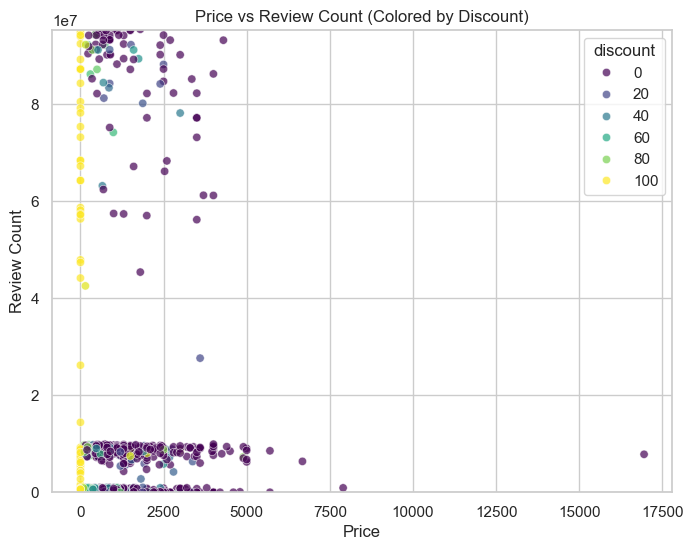

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="price", y="review_count", hue="discount", palette="viridis", alpha=0.7)
plt.title("Price vs Review Count (Colored by Discount)")
plt.xlabel("Price")
plt.ylabel("Review Count")
plt.ylim(0, df['review_count'].quantile(0.95)) # trimming extreme outliers
plt.show()

# Observation:
- Games with 0% discount tend to spread across all price ranges.
- Free or highly discounted games tend to have higher reviews, reinforcing the idea that lower cost boosts engagement.

# 4. Heatmap of Reviews, Price, and Year

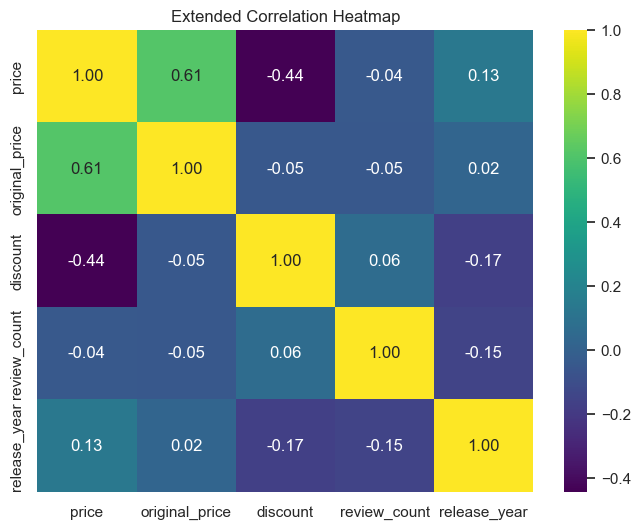

In [43]:
corr2 = df[['price','original_price','discount','review_count','release_year']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr2, annot=True, cmap="viridis", fmt=".2f")
plt.title("Extended Correlation Heatmap")
plt.show()


# Observation:
- Release year has weak correlation with pricing and reviews. Price–discount–original price remain the strongest relationships.

# 5. Facet Grid of Price Distribution by Platform

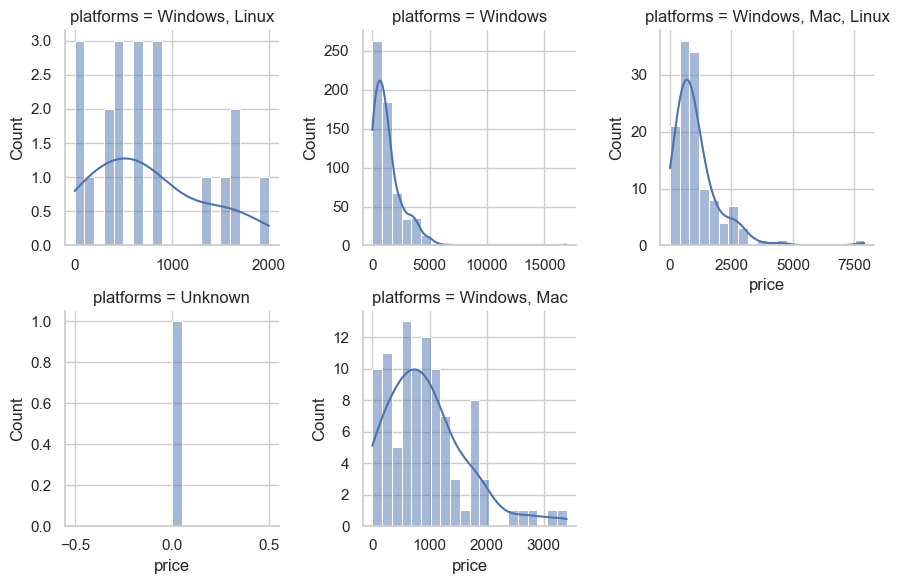

In [44]:
g = sns.FacetGrid(df, col="platforms", col_wrap=3, sharex=False, sharey=False)
g.map(sns.histplot, "price", bins=20, kde=True)
plt.show()


# Observation:
- Windows has the widest price range. Other platforms show limited distribution, often clustering at free/cheap games.